# Inspeccion y visualizacion

Es esta unidad exploramos la biblioteca **matplotlib** que nos va a permitir representar graficamente los datos para su apropiada inspección.

In [1]:
from matplotlib import pyplot as plt

## pyplot.plot()

Es una forma rapida y sencilla para crear curvas

Una particularidad de la biblioteca es que nos permite utilizar arrays del tipo de `NumPy` haciendo muy sencillo poder trabajar con ambas bibliotecas

In [2]:
import numpy as np
xs = np.linspace(0, 2, 100)

- Creamos un array de 100 numeros entre 0 y 2

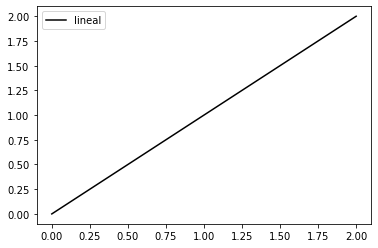

In [3]:
plt.plot(xs, xs, "black", label="lineal")
plt.legend()
plt.show()

- Como primer parametro indicamos los valores del eje x del grafico
- Como segundo parametro, los del eje y
- Opcionalmente podemos indicar como tercer parametro el estilo de la linea (en este caso "black")
- Finalmente, y tambien opcional, podemos tambien especificar una etiqueta para la curva a graficar utilizando el parametro `label`
    - Para que esta esta etiqueta se visualise hay que utilizar el metodo `legend()`

**Otros ejemplos:**

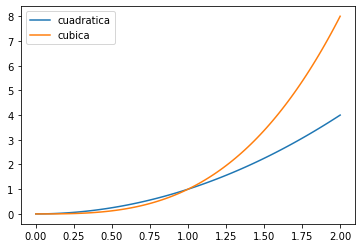

In [4]:
plt.plot(xs, xs**2, label="cuadratica")
plt.plot(xs, xs**3, label="cubica")
plt.legend()
plt.show()

- Notese la utilidad de los arrays de `NumPy` que nos permiten realizar operaciones matematicas sobre todos sus elementos de forma muy sencilla
    - `xs ** 2`: elevar todos los elementos del array al cuadrado
    - `xs * 2`: multiplicar todos los elementos del array por 2
    - etc.

Otra forma de representar los graficos de linea es especificando unicamente los valores de y. Matplotlib le asignará a cada uno un valor de x entero creciente.

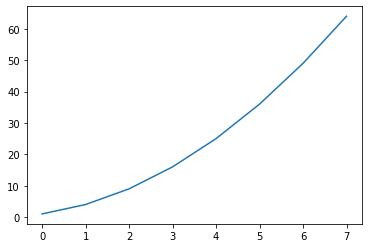

In [5]:
plt.plot([1,4,9,16,25,36,49,64])
plt.show()

## pyplot.legend()

Permite que las etiquetas se muestren en pantalla
- Opcionalmente podemos pasarle como parametro las coordenadas donde queremos que aparescan las etiquetas

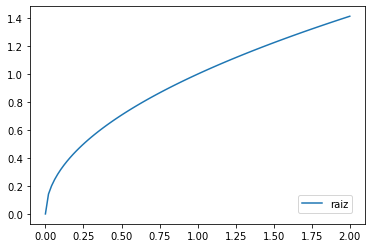

In [6]:
plt.plot(xs, xs ** 0.5, label="raiz")
plt.legend(loc=(0.8,0.05))
plt.show()

- Donde la esquina superior derecha representa la coordenada (1, 1) y la esquina inferior izquierda la (0, 0)

## Titulos y ejes

Podemos dar descripciones a los ejes y un titulo al grafico utilizando los metodos: `xlabel`, `xlabel` y `title` respectivamente.

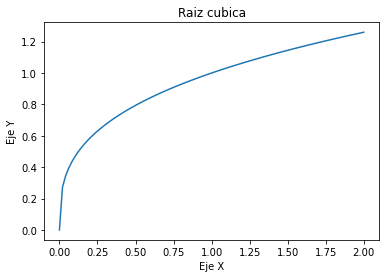

In [7]:
plt.plot(xs, xs ** (1/3))
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Raiz cubica")
plt.show()

## Limites en ejes

Tambien podemos especificar los valores minimos y maximos para cada eje del grafico utilizando `xlim` y `ylim` respectivamente.

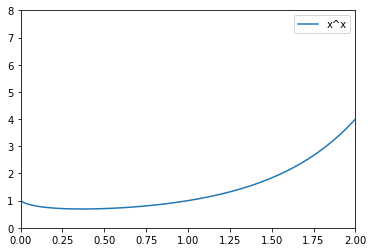

In [8]:
plt.plot(xs, xs ** xs, label="x^x")
plt.xlim(0, 2)
plt.ylim(0, 8)
plt.legend()
plt.show()

## pyplot.grid()

Agrega una grilla al grafico.

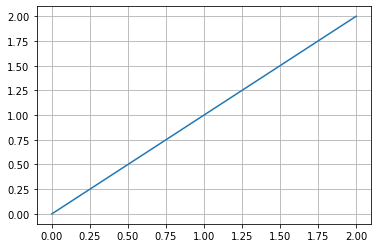

In [9]:
plt.plot(xs, xs)
plt.grid()
plt.show()

## Graficos de dispersión

Utilizamos el metodo `scatter()` para graficar puntos que no representan una curva, sino multiples puntos.

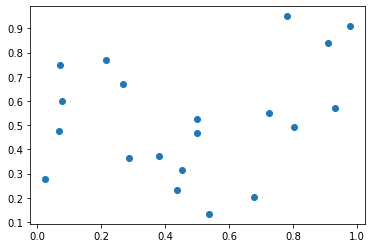

In [10]:
np.random.seed(7)
datos = np.random.rand(2, 20)
plt.scatter(datos[0], datos[1])
plt.show()

- Para este ejemplo generamos los datos utilizando la funcion `rand` de `numpy.random`
    - Como primer parametro indicamos la cantidad de arrays que queremos generar
        - `datos[0]` y `datos[1]`
        - Como dato de color, en python podemos destructurar este vector de la siguiente manera: \
            `xs, ys = np.random.rand(2, 20)`
    - Como segundo parametro indicamos el tamaño de cada muestra a generar (en nuestro ejemplo: 20 numeros)
- Tambien podemos especificar el valor de la semilla de la cual se partirá para la generacion de los valores "random" utilizando la funcion `seed()` de `numpy.random`
    - En nuestro ejemplo elejimos de forma arbitraria "7"
- Poder especificar la semilla nos permite que el programa siempre genere los mismo valores random cada vez que se reinicia (si esto es lo que se desea)

#### **Otro ejemplo**:

Podemos introducir a la biblioteca `sklearn` para generar datos que representen distintos grupos de disperciones
- Para ello utilizamos su funcion `make_blobs`

In [11]:
from sklearn.datasets import make_blobs

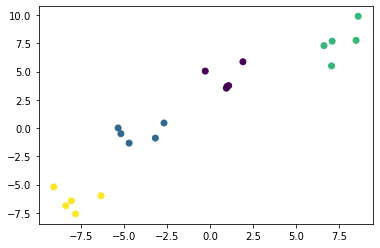

In [12]:
datos, features = make_blobs(n_samples=20, centers=4, random_state=3)
xs = datos[:, 0]
ys = datos[:, 1]
plt.scatter(xs, ys, c=features)
plt.show()

- `make_blobs` genera puntos basados en la distribucion "Gaussiana isitópica"
- En nuestro ejemplo generemos 20 muestras/puntos (`n_samples`), distribuidas en 4 centros (`centers`), con una semilla para generar valores random de 3 (`random_state`)
- Ademas de un vector con los datos, `make_blobs` retorna un vector "features" que clasifica a cada uno de los puntos con un valor numerico para que asi podamos colorearlos acorde a su clasificacion

In [13]:
print(features)

[3 1 1 2 1 3 0 3 2 1 3 2 0 2 1 2 0 0 3 0]


- Notese que hay 4 clasificaciones: _amarillo, azul, violeta, verde_ equivalente a la cantidad de centros elejidos
- Notese tambien la facilidad con la que se puede trabajar en conjunto con `numpy`, `sklearn` y `matplotlib`

## Graficar polinomios

NumPy nos permite, tambien, **ajustar** una curva por un polinomio utilizando los metodos `polyfit()` y `poly1d()`

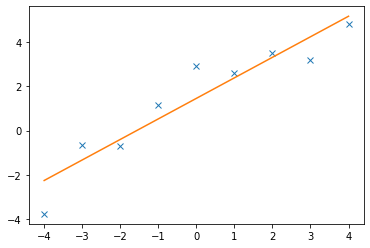

In [14]:
xs = list(range(-4 , 5))

np.random.seed(7)
imperfecciones = np.random.rand(1, len(xs)) * 3

ys = [x + imperfecciones[0, i] for i, x in enumerate(xs)]

coeficientes = np.polyfit(xs, ys, 1)
f = np.poly1d(coeficientes)

plt.plot(xs, ys, 'x')
plt.plot(xs, f(xs))
plt.show()

1. Primero generamos un dominio de valores de x (`xs`)
2. Luego generamos imperfecciones de forma random para simular que los valores de y (`ys`) no se ajustan exactamente a una recta
3. Generamos los valores de y usando las imperfecciones
4. Calculamos los coeficientes del polinomio que mejor se ajusta a los puntos generados
    - Para ello especificamos los valores de X, los valores de Y y el grado del polinomio al que queremos ajustar los datos (en nuestro caso 1: una recta)
5. Luego podemos utilizar estas coeficientes para generar una funcion que represente la recta (`f`)
    - Para ello utilizamos el metodo `poly1d()` pasandole como parametro la lista de coeficientes del polinomio
6. Finalmente dibujamos en primer lugar los puntos generados marcandolos con una "x" (estilo), luego graficamos el polinomio obtenido utilizando los valores de X generados y su correspondiente imagen obtenida a partir de evaluar cada uno de estos valores con la funcion obtenida

## Mapa de colores

Muchas veces es mas facil visualizar cambios en los datos cuando a estos se les asocia un color a través de un mapa de colores.

Es podemos lograrlo utilizando el modulo `matplotlib.colors`:

In [15]:
import matplotlib.colors as colors

Primero generemos datos de forma random:

In [16]:
np.random.seed(20)

puntos = np.random.rand(50, 2)
xs, ys = zip(*puntos)

Ahora vamos a asociarle un valor a cada uno de los puntos que luego va a impactar sobre qué color del mapa de colores va a utilizar:

In [17]:
color_factor = []
for y in ys:
    color_factor.append(y)

- El factor de color en nuestro ejemplo es igual al valor de Y del punto

Luego creamos el mapa de colores, para ello en este ejemplo utilizamos un `LinearSegmentedColormap`:

In [18]:
color_map = colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green", "blue"])

Finalmente graficamos los puntos donde el parametro `c` indica el factor de color de cada uno y el parametro `cmap` indica qué mapa de colores utilizar

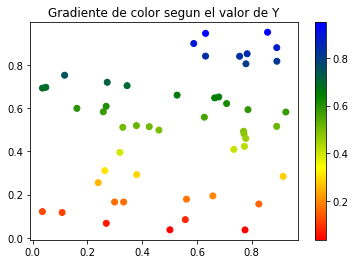

In [19]:
plt.title("Gradiente de color segun el valor de Y")
plt.scatter(xs, ys, c=color_factor, cmap=color_map)

plt.colorbar()
plt.show()

- Podemos utilizar la funcion `colorbar()` para hacer visible una barra con el mapa de colores utilizado

## Conceptos importantes a la hora de trabajar con matplotlib

- **Figure:** Area que contiene a el o los graficos a representar
- **Axes:** Son los graficos que estan dentro de la figura
- **Axis:** Los ejes de cada _axes_

**Ejemplo:**

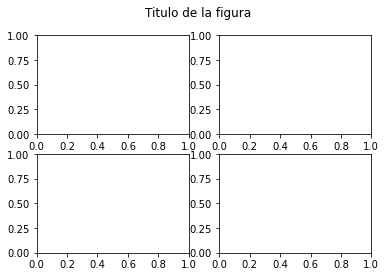

In [20]:
fig, axes = plt.subplots(2, 2)  # Figura con 2 filas y 2 columnas => 4 graficos
fig.suptitle("Titulo de la figura")
plt.show()

Podemos ver que la variables `axes` es una matriz de "subplots":

In [21]:
print(axes)

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


Podemos trabajar con cada `axes` de forma individual:

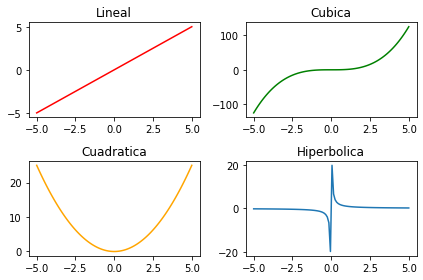

In [22]:
xs = np.linspace(-5, 5, 100)

fig, axes = plt.subplots(2, 2)

axes[0,0].set_title("Lineal")
axes[0,0].plot(xs, xs, color="red")

axes[1,0].set_title("Cuadratica")
axes[1,0].plot(xs, xs ** 2, color="orange")

axes[0,1].set_title("Cubica")
axes[0,1].plot(xs, xs ** 3, color="green")

axes[1,1].set_title("Hiperbolica")
axes[1,1].plot(xs, xs ** (-1))

plt.tight_layout()  # Agrega separacion entre los diferentes graficos
plt.show()

<br>

_Para mas informacion podemos consultar la documentacion oficial: [Matplotlib Docs](https://matplotlib.org)_